<h2 style='color:purple' align='center'>Naive Bayes Tutorial Part 2: Explore Spam Email Dataset</h2>

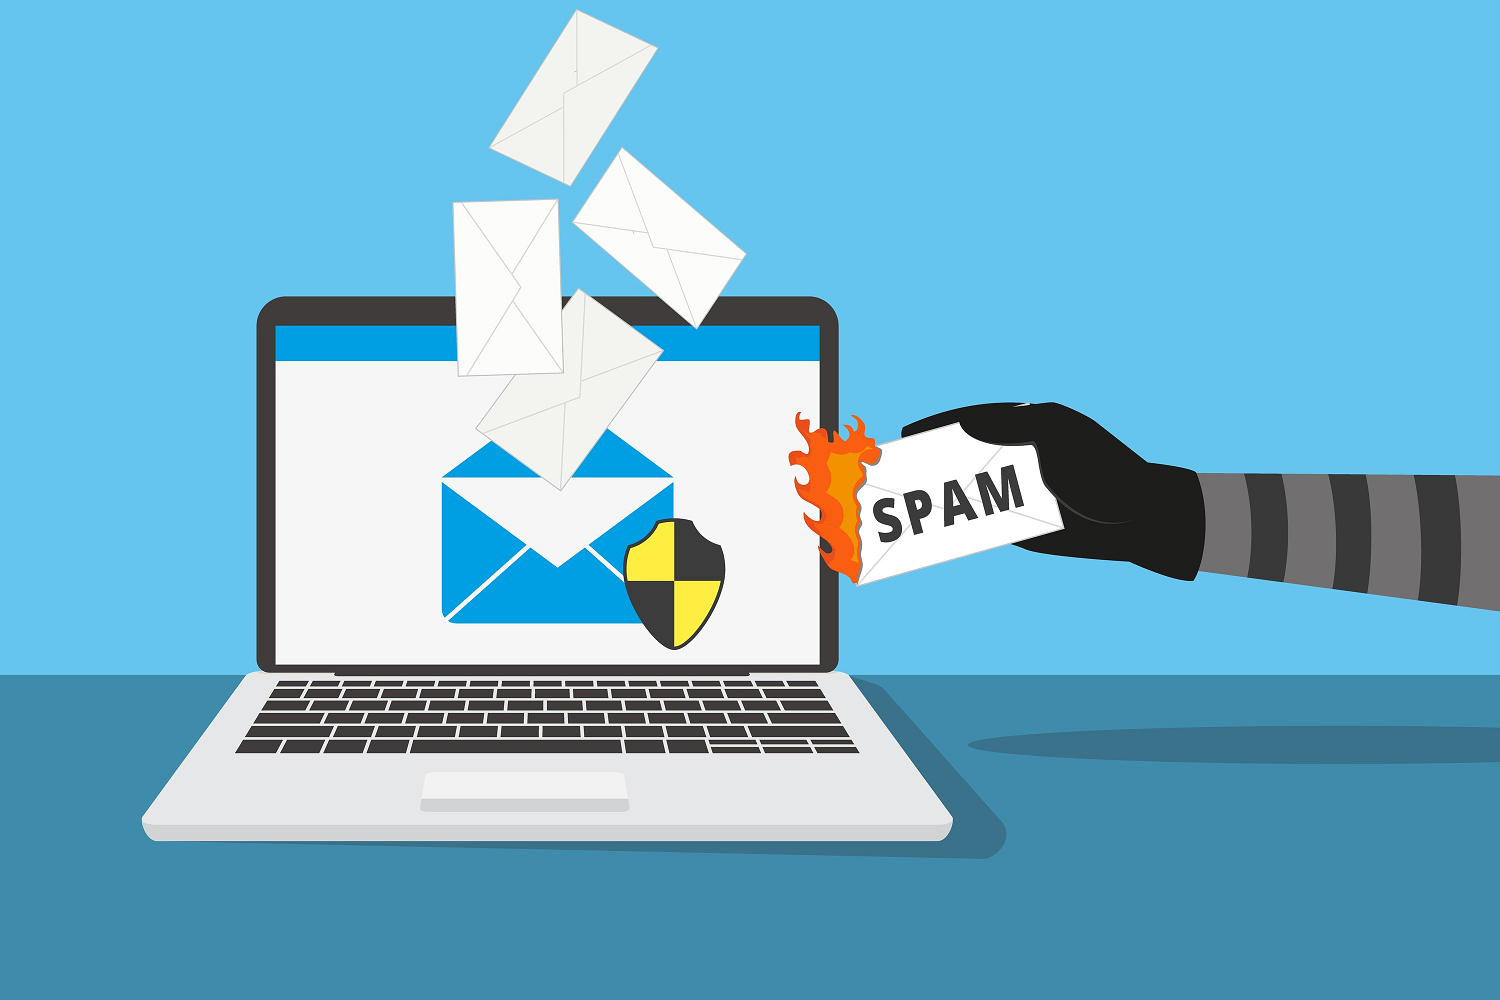

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("D:/Data_Science/My Github/Machine-Learning-with-Python/14. naive_bayes/2. naive_bayes_email_spam_filter/spam.csv")
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
df.groupby('Category').describe()

Message                                                            \
           count unique                                                top   
Category                                                                     
ham         4825   4516                             Sorry, I'll call later   
spam         747    641  Please call our customer service representativ...   

               
         freq  
Category       
ham        30  
spam        4

In [4]:
#Convert Category into numbers spam=1  ham=0
df['spam']=df['Category'].apply(lambda x: 1 if x=='spam' else 0)
df.head()

,Category,Message,spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


**train test split**

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.Message,df.spam,test_size=0.25)

But Message column is still text and must convert it into numbers.**Solution: CountVectorizing Technique**

# CountVectorizing Technique
<div style='text-align:justify'>Assume you have 4 documents with all these text. One of the ways to convert this into matrix or vector is you found that the unique words in each of these documents(<b>i.e. and, document, first, is, one, second, the, third, this</b>). Now you can treat these 9 words as feature and you can build a matrix. Look at the first column: the occurance of "and" in first document is 0, and so on.</div>

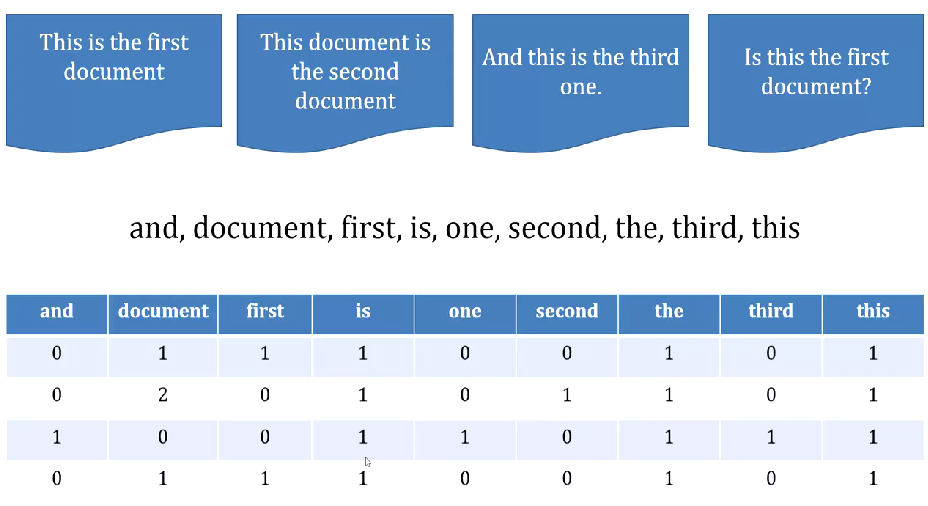

In [6]:
from sklearn.feature_extraction.text import CountVectorizer
v = CountVectorizer()
X_train_count = v.fit_transform(X_train.values)
X_train_count.toarray()[:2]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

## There are 3 types of Naive Bayes model under the scikit-learn library:
1. Bernoulli: The binomial model is useful if your **feature** vectors are binary (**i.e. zeros and ones**).
2. Multinomial: It is used for **discrete data**(e.g. movie ratings rangong 1 and 5 as each rating will have certain **frequency** to represent). In text learning we have the **count** of each word to predict the class or label.
3. Gaussian: It is used in classification and it assumes that features follow a **normal distribution**.

In [7]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train_count,y_train)

MultinomialNB()

In [8]:
emails = [
    'Hey mohan, can we get together to watch footbal game tomorrow?',
    'Upto 20% discount on parking, exclusive offer just for you. Dont miss this reward!'
]
emails_count = v.transform(emails)
model.predict(emails_count)

array([0, 1], dtype=int64)

**It predicts the second email as '1' which is spam.**

In [9]:
# measure the accuracy
X_test_count = v.transform(X_test)
model.score(X_test_count, y_test)

0.9849246231155779

Problem: Whenever I want to use the model.fit I should use v.transform my data. (**Solution: Sklearn pipeline**)

**Sklearn Pipeline**

In [10]:
from sklearn.pipeline import Pipeline
clf = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('nb', MultinomialNB())
])

Here I created a pipeline in 2 steps:
1. Convert my text into vector by using CountVectorizer
2. Apply the MultinomialNB

In [11]:
# This time there is no need for transform data
clf.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()), ('nb', MultinomialNB())])

In [12]:
clf.score(X_test,y_test)

0.9849246231155779

In [13]:
clf.predict(emails)

array([0, 1], dtype=int64)

|  Date |  Author |   |   |
|---|---|---|---|
| 2021-10-14    |   <font color=blue>**Ehsan Zia**</font>  |  |  |